# Python for Problem Solving and Data Analytics *(Individual Work)*


## Final Project


### Context

1- What is **NIST** and which functions do they perform?

The National Institute of Standards and Technology (NIST) [1] is an institution that provides support in research and development in various fields, including machine learning, data analytics, and cybersecurity. In fact, the NIST make available some datasets which are widely used in research and industry to evaluate the performance of machine learning algorithms, data processing tools, and other software.

In this final project, we are going to work on the Industrial Control System (ICS) which NIST defines as "An information system used to control industrial processes such as manufacturing, product handling, production, and distribution." [1]

One area of focus for NIST is the development and promotion of standards and best practices related to industrial control systems (ICS). ICS are used to control and monitor industrial processes, such as those in manufacturing, energy production, and other critical infrastructure sectors. NIST works with stakeholders to identify and prioritize ICS cybersecurity needs and develops guidance and standards to help organizations protect their ICS from cyber threats. NIST also conducts research and development on technologies and approaches to improve the security and resilience of ICS [2].

**********************************************************************************************************************

**********************************************************************************************************************

**********************************************************************************************************************

2- What is the *task assigned* to us?

The dataset used for this project is based on measurements of typical, disruptive, controllable, and cyberattack behaviors for a power system [3]. Power system operations can be compromised by **both natural and man-made occurrences**, like as cyberattacks on ICS, which can have catastrophic effects for *economies, security, and households*. When creating interventions to make the systems more resilient, accurate detection of man-made events (cyberattacks) on ICS regulating power systems is crucial. Building and assessing machine learning (ML) models for spotting power system problems will be the focus of this project.

The related paper has been provided and according to the abstract [4], the *goal was to investigate the applicability of Machine Learning as a method for differentiating forms of power system disturbances in order to support human decision-making*. Throughout the paper, the authors concentrated particularly on identifying cyber-attacks where deception is a key component of the event. As disturbance discriminators, they compared different Machine Learning techniques and went further to implement Machine Learning systems as an improvement to current power system topologies.

**Our work will use this paper as a reference.**

We are asked to develop, train and compare the performance of several Machine Learning algorithms in this specific context. 

## Methodology

- Firstly, we will import all (progressively) the libraries that appear important for this project. It all starts there.

- Secondly, we will perform a deep Exploratory Data Analysis (EDA) on the dataset obtained and write down the different insights.

- Thirdly, we are going to train some models and compare their performance on the data

- Last, but not least, we will write a report to back up all our findings from the data. 

In [70]:
# Necessary Libraries

# Displaying images
from IPython.display import Image

# Exploration and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# For feature selection
import statsmodels.api as sm                                                        

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report
# Withdraw Warnings
import warnings
warnings.filterwarnings("ignore")

## Downloading - Exploration - Preparation - Visualization

In [71]:
# Creating a list of the NIST datasets you want to merge
nist_datasets = [
    "triple/data1.csv",
    "triple/data2.csv",
    "triple/data3.csv",
    "triple/data4.csv",
    "triple/data5.csv",
    "triple/data6.csv",
    "triple/data7.csv",
    "triple/data8.csv",
    "triple/data9.csv",
    "triple/data10.csv",
    "triple/data11.csv",
    "triple/data12.csv",
    "triple/data13.csv",
    "triple/data14.csv",
    "triple/data15.csv",
    
]

# Use a for loop to read each dataset into a pandas dataframe and add it to a list of dataframes
dfs = []
for dataset in nist_datasets:
    df = pd.read_csv(dataset)
    dfs.append(df)

# Use the pandas concat function to merge all of the dataframes into a single dataframe
merged_df = pd.concat(dfs)

In [72]:
merged_df

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,NoEvents
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,NoEvents
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,141.589330,131885.4002,21.606238,131860.3269,-98.382583,131960.6200,143.348311,309.45590,22.156278,315.13231,...,0,0,0,0,0,0,0,0,0,Natural
5272,141.526305,131960.6200,21.566131,131910.4735,-98.439879,132010.7666,143.010266,310.37145,21.915636,315.49853,...,0,0,0,0,0,0,0,0,0,Natural
5273,141.365877,132035.8398,21.394244,131985.6933,-98.611766,132085.9864,141.950294,313.30121,21.245275,317.14652,...,0,0,0,0,0,0,0,0,0,Natural
5274,141.348688,132035.8398,21.371326,131985.6933,-98.617496,132111.0596,141.829973,313.11810,21.193709,317.51274,...,0,0,0,0,0,0,0,0,0,Natural


As you can see, we have **78377** rows in the merged data but the last record has an index of **5275** which is not a good thing actually.

We need to reset the index for uniformity.

In [73]:
# Resetting Index otherwise they will be duplicate values in the index
data = merged_df.reset_index(drop=True)

# Saving the dataframe into a csv file named data.csv
#merged_df.to_csv('data.csv')
data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,NoEvents
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,NoEvents
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,141.589330,131885.4002,21.606238,131860.3269,-98.382583,131960.6200,143.348311,309.45590,22.156278,315.13231,...,0,0,0,0,0,0,0,0,0,Natural
78373,141.526305,131960.6200,21.566131,131910.4735,-98.439879,132010.7666,143.010266,310.37145,21.915636,315.49853,...,0,0,0,0,0,0,0,0,0,Natural
78374,141.365877,132035.8398,21.394244,131985.6933,-98.611766,132085.9864,141.950294,313.30121,21.245275,317.14652,...,0,0,0,0,0,0,0,0,0,Natural
78375,141.348688,132035.8398,21.371326,131985.6933,-98.617496,132111.0596,141.829973,313.11810,21.193709,317.51274,...,0,0,0,0,0,0,0,0,0,Natural


The dataset is now uniform in terms of indexes.

In [74]:
data.head(10)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,NoEvents
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,NoEvents
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,NoEvents
5,74.547539,131057.9823,-45.441283,131032.9090,-165.441563,131133.2021,71.780153,486.52327,-50.179644,498.05920,...,0,0,0,0,0,0,0,0,0,NoEvents
6,74.536080,131007.8358,-45.458471,131007.8358,-165.453023,131083.0556,71.671291,487.07260,-50.185373,497.87609,...,0,0,0,0,0,0,0,0,0,NoEvents
7,74.501702,130982.7625,-45.475660,130957.6892,-165.475941,131057.9823,71.528051,487.98815,-50.191103,498.05920,...,0,0,0,0,0,0,0,0,0,NoEvents
8,74.444406,130932.6159,-45.532956,130932.6159,-165.521777,131007.8358,71.224384,489.45303,-50.362990,498.79164,...,0,0,0,0,0,0,0,0,0,NoEvents
9,74.283978,130857.3961,-45.716302,130857.3961,-165.705124,130932.6159,70.605589,491.65035,-50.632280,499.34097,...,0,0,0,0,0,0,0,0,0,NoEvents


In [75]:
data.tail(10)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
78367,145.376581,133565.3093,25.387760,133540.2360,-94.606791,133640.5291,151.146266,318.24518,28.338493,329.96422,...,0,0,0,0,0,0,0,0,0,Natural
78368,141.703922,131760.0339,21.738019,131709.8873,-98.267991,131810.1804,144.562981,306.15992,22.981337,312.56877,...,0,0,0,0,0,0,0,0,0,Natural
78369,141.692463,131760.0339,21.726560,131734.9606,-98.267991,131810.1804,144.471308,306.52614,22.906853,313.11810,...,0,0,0,0,0,0,0,0,0,Natural
78370,141.640896,131835.2537,21.657805,131810.1804,-98.342476,131885.4002,143.812407,307.99102,22.374002,314.58298,...,0,0,0,0,0,0,0,0,0,Natural
78371,141.595060,131885.4002,21.629157,131860.3269,-98.376853,131910.4735,143.537387,309.08968,22.179196,314.94920,...,0,0,0,0,0,0,0,0,0,Natural
78372,141.589330,131885.4002,21.606238,131860.3269,-98.382583,131960.6200,143.348311,309.45590,22.156278,315.13231,...,0,0,0,0,0,0,0,0,0,Natural
78373,141.526305,131960.6200,21.566131,131910.4735,-98.439879,132010.7666,143.010266,310.37145,21.915636,315.49853,...,0,0,0,0,0,0,0,0,0,Natural
78374,141.365877,132035.8398,21.394244,131985.6933,-98.611766,132085.9864,141.950294,313.30121,21.245275,317.14652,...,0,0,0,0,0,0,0,0,0,Natural
78375,141.348688,132035.8398,21.371326,131985.6933,-98.617496,132111.0596,141.829973,313.11810,21.193709,317.51274,...,0,0,0,0,0,0,0,0,0,Natural
78376,141.251285,132035.8398,21.291112,132010.7666,-98.720628,132085.9864,141.554953,313.85054,20.958796,317.69585,...,0,0,0,0,0,0,0,0,0,Natural


In [76]:
data.sample(15)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
37292,-63.185786,132035.8398,176.837694,131409.0081,56.843143,132085.9864,-64.297324,332.16154,175.743345,331.97843,...,0,0,0,0,0,0,0,0,0,Attack
33860,92.400904,132060.9131,-27.587918,131434.0813,-147.565280,132136.1329,100.124375,271.00280,-26.550864,297.00442,...,0,0,0,0,0,0,0,0,0,Attack
71027,-117.330297,133615.4558,122.675994,132963.5508,2.681442,133690.6756,-120.624805,294.62399,119.415864,294.80710,...,0,0,0,0,0,0,0,0,0,Attack
31821,-149.415934,131709.8873,90.590357,131057.9823,-29.387005,131760.0339,-146.768869,340.58460,89.444441,355.78273,...,0,0,0,0,0,0,0,0,0,Attack
64995,-98.611766,130757.1031,141.417443,130732.0298,21.417162,130832.3229,-103.235535,506.11604,136.323848,510.51068,...,0,0,0,0,0,0,0,0,0,Attack
12988,57.163999,133891.2618,-62.813363,133866.1885,177.192928,133966.4816,0.000000,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,Attack
57478,-135.630569,134192.1410,104.484583,134493.0203,-15.435483,134568.2401,-44.587576,64.27161,-166.719259,64.63783,...,0,0,1,0,0,0,0,0,0,Natural
62691,-150.768114,134442.8737,89.255365,134417.8005,-30.750645,134518.0936,-146.556874,448.80261,90.951320,465.64873,...,0,0,0,0,0,0,0,0,0,Natural
21312,-8.920953,131208.4219,-128.892586,131183.3486,111.096517,131283.6417,-9.224621,412.72994,-132.066772,426.09697,...,0,0,0,0,0,0,0,0,0,Attack
14684,-57.026489,131183.3486,-177.021040,130531.4436,62.996710,131233.4952,-60.624664,462.90208,179.713942,461.98653,...,0,0,0,0,0,0,0,0,0,Natural


In [77]:
data.iloc[5000:17000]

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
5000,-33.328955,130882.46940,-153.300588,130857.3961,86.699974,130932.6159,-37.740730,469.49404,-157.609230,469.31093,...,0,0,0,0,0,0,0,0,0,NoEvents
5001,-33.414899,131007.83580,-153.375072,130957.6892,86.619759,131057.9823,-37.809485,469.31093,-157.643608,468.94471,...,0,0,0,0,0,0,0,0,0,NoEvents
5002,-33.621163,131083.05560,-153.587067,131032.9090,86.402036,131133.2021,-38.027209,468.94471,-157.844143,468.57849,...,0,0,0,0,0,0,0,0,0,NoEvents
5003,-29.593270,131960.62000,-149.564903,131910.4735,90.424199,132010.7666,-32.085637,385.26344,-151.896841,384.71411,...,0,0,0,0,0,0,0,0,0,NoEvents
5004,-29.627648,131860.32690,-149.593551,131835.2537,90.395551,131910.4735,-32.165851,385.44655,-151.919759,384.89722,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,122.618698,26176.49388,19.612345,116716.0719,-121.828016,115763.2876,79.566649,1772.68791,30.510003,720.72096,...,0,0,0,0,0,0,0,0,0,Attack
16996,121.363920,133515.16280,1.363640,132863.2577,-118.619452,133565.3093,118.550697,317.51274,-2.469448,320.80872,...,0,0,0,0,0,0,0,0,0,Attack
16997,120.808151,132762.96470,0.825059,132111.0596,-119.163762,132813.1112,119.129385,314.39987,-1.758980,317.32963,...,0,0,0,0,0,0,0,0,0,Attack
16998,120.441458,132336.71910,0.446907,131709.8873,-119.541914,132386.8656,119.622129,312.01944,-1.105809,314.21676,...,0,0,0,0,0,0,0,0,0,Attack


In [78]:
data.shape

(78377, 129)

The dataset obtained is made of 78377 rows and 129 columns which is quite important.

In [79]:
data.columns.to_list()

['R1-PA1:VH',
 'R1-PM1:V',
 'R1-PA2:VH',
 'R1-PM2:V',
 'R1-PA3:VH',
 'R1-PM3:V',
 'R1-PA4:IH',
 'R1-PM4:I',
 'R1-PA5:IH',
 'R1-PM5:I',
 'R1-PA6:IH',
 'R1-PM6:I',
 'R1-PA7:VH',
 'R1-PM7:V',
 'R1-PA8:VH',
 'R1-PM8:V',
 'R1-PA9:VH',
 'R1-PM9:V',
 'R1-PA10:IH',
 'R1-PM10:I',
 'R1-PA11:IH',
 'R1-PM11:I',
 'R1-PA12:IH',
 'R1-PM12:I',
 'R1:F',
 'R1:DF',
 'R1-PA:Z',
 'R1-PA:ZH',
 'R1:S',
 'R2-PA1:VH',
 'R2-PM1:V',
 'R2-PA2:VH',
 'R2-PM2:V',
 'R2-PA3:VH',
 'R2-PM3:V',
 'R2-PA4:IH',
 'R2-PM4:I',
 'R2-PA5:IH',
 'R2-PM5:I',
 'R2-PA6:IH',
 'R2-PM6:I',
 'R2-PA7:VH',
 'R2-PM7:V',
 'R2-PA8:VH',
 'R2-PM8:V',
 'R2-PA9:VH',
 'R2-PM9:V',
 'R2-PA10:IH',
 'R2-PM10:I',
 'R2-PA11:IH',
 'R2-PM11:I',
 'R2-PA12:IH',
 'R2-PM12:I',
 'R2:F',
 'R2:DF',
 'R2-PA:Z',
 'R2-PA:ZH',
 'R2:S',
 'R3-PA1:VH',
 'R3-PM1:V',
 'R3-PA2:VH',
 'R3-PM2:V',
 'R3-PA3:VH',
 'R3-PM3:V',
 'R3-PA4:IH',
 'R3-PM4:I',
 'R3-PA5:IH',
 'R3-PM5:I',
 'R3-PA6:IH',
 'R3-PM6:I',
 'R3-PA7:VH',
 'R3-PM7:V',
 'R3-PA8:VH',
 'R3-PM8:V',
 'R3-PA9:VH',
 'R3

In [129]:
# The power system illustrated (Source: [4])
# The paper is directly accessible on CMU Library at: https://ieeexplore-ieee-org.cmu.idm.oclc.org/document/6900095 
#Image(filename='./power system.gif', width=300, height=100)

# Please find the image in the References of the Report

We are trying to understand what the columns are about but we have not found enough information.
Nevertheless, the previous image, got from the related paper informs us more about how the power system works and from that we derive some information.

- R1, R2, R3 and R4 are called **Intelligent Electronic Device** (IED) and as you could have probably noticed, there are the main components of some **columns names**.


- These devices are used to monitor and control various types of industrial equipment, such as pumps, motors, and valves.


- They may also be used to monitor and control industrial processes, such as production or manufacturing.


- In an **ICS context** which is ours, IEDs are typically connected to a network of other devices and systems, such as sensors and control systems, and can communicate with each other and with a central control system.


- They may be used **to collect and transmit data**, as well as to control and automate various processes. In this case they play a great part in collecting the different *measurements* observed in the datasets.


- While IEDs in an ICS environment are typically used for legitimate purposes, they can also present potential security vulnerabilities if they are not properly configured and secured.


- There is a risk that IEDs could be targeted by malicious actors seeking to disrupt or compromise industrial processes or systems.


- That is one of the reasons why it is important to take appropriate measures to protect and secure IEDs in an ICS environment.


*Additional References* [5,6]


#### This last point justifies the main goal of the final project --> Machine Learning for Security.

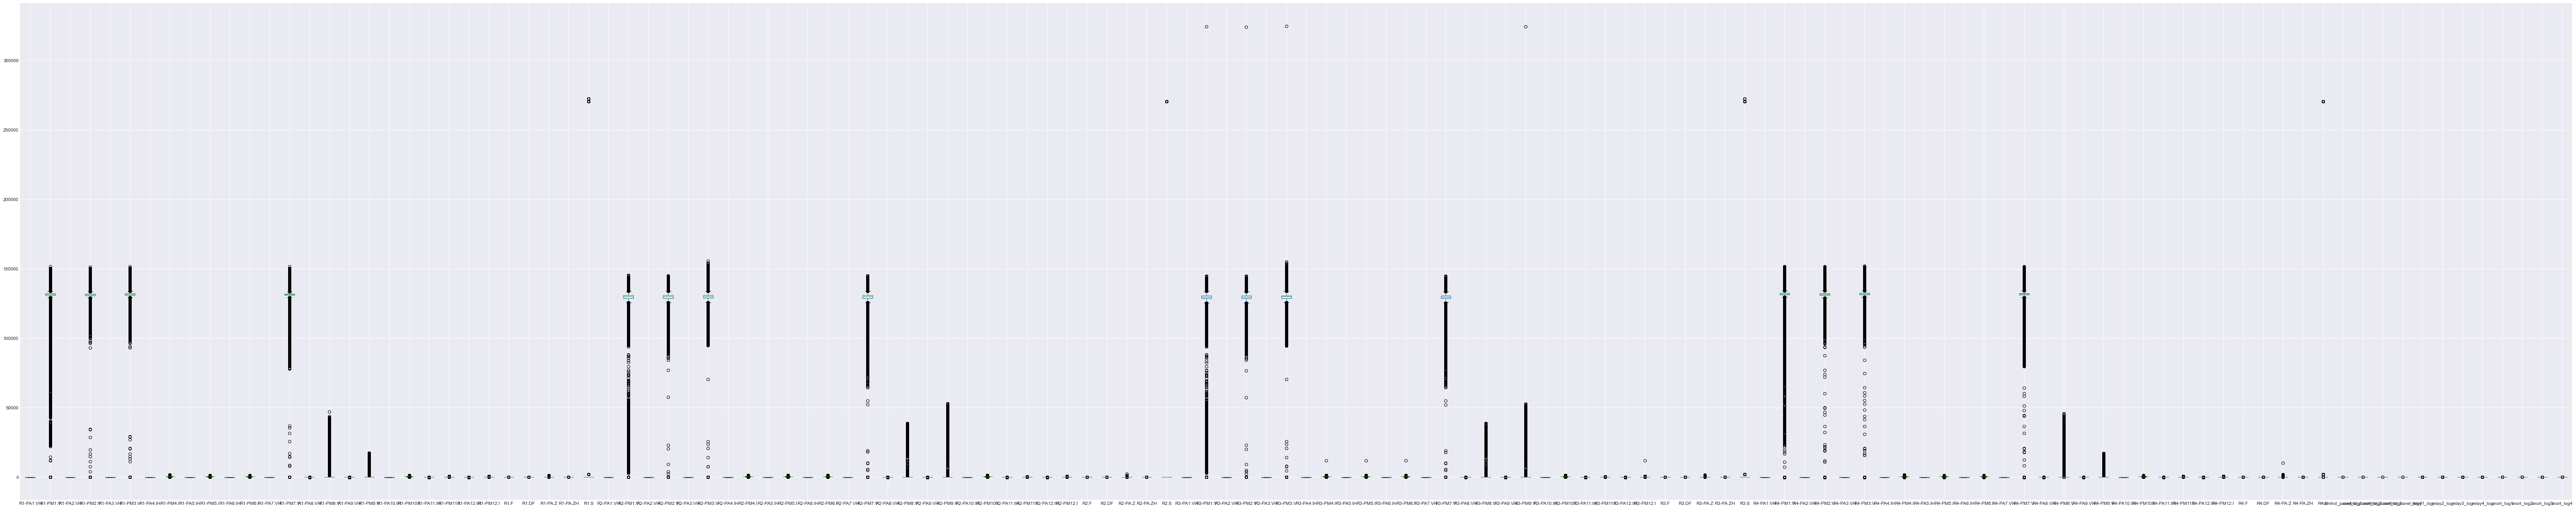

In [81]:
# Checking for outliers

# Setting a big size for a better visibility
plt.figure(figsize=(100,20))

data.boxplot()
plt.show()

# It is possible to see correctly if you zoom in

The 128 boxplots (represented by each numerical column) are represented in the previous cell.


* When we zoom in, we can clearly find the box itself, the whiskers, the min and max values on each boxplot.


* Graphically, it can be seen that several values are lower than the minimum and higher than the maximum.


* This denotes the effective presence of outliers in the dataset and it can affect the representativity of the data.


* For this project's purpose, we will transform the data to obtain a better representativity.

In [82]:
# Statistical Description
data.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,...,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000
mean,-15.802424,130764.039577,2.175196,131035.528095,6.834315,131395.717581,-14.334996,393.949321,3.538540,387.438133,...,0.000026,0.000026,0.035916,0.026436,0.026500,0.035597,0.000051,0.000051,0.000089,0.000077
std,100.876750,8546.118477,111.743169,5393.135370,97.065063,5443.752388,99.601107,190.966011,109.504977,151.277183,...,0.005051,0.005051,0.186082,0.160430,0.160618,0.185285,0.007144,0.007144,0.009450,0.008749
min,-179.988962,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-100.416583,131057.982300,-102.129727,130732.029800,-69.459673,131133.202100,-98.159129,305.793700,-94.790138,311.836330,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-28.865614,131684.814000,8.118812,131358.861500,13.401483,131760.033900,-23.514188,378.671480,1.885031,383.249230,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.096034,132186.279400,104.897113,131885.400200,85.324875,132261.499300,66.274028,456.676340,102.674037,460.338540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,179.994691,151592.990400,179.994691,151567.917200,179.988962,151693.283500,179.994691,1779.462980,179.994691,1265.656320,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


For each column, there are some basic statistics provided. The number of columns is important but we can easily see that values differ drastically from each other. While some look very high, others are even negative. Moreover, there are some columns who have 0 as their minimum.


Notice that there are 128 rows included in the describe function results.

That may infer that there is **one** column which is not numerical.

Let us find the one.

In [83]:
# Running info() for more details on the columns features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(15), object(1)
memory usage: 77.1+ MB


In [84]:
# Running info for much more details on the columns features
data.info

<bound method DataFrame.info of         R1-PA1:VH     R1-PM1:V  R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0       70.399324  127673.0908 -49.572308  127648.0176 -169.578319   
1       73.688102  130280.7109 -46.300719  130255.6377 -166.278082   
2       73.733939  130305.7842 -46.254883  130280.7109 -166.232245   
3       74.083443  130581.5902 -45.899649  130556.5169 -165.882741   
4       74.553268  131083.0556 -45.424094  131057.9823 -165.424375   
...           ...          ...        ...          ...         ...   
78372  141.589330  131885.4002  21.606238  131860.3269  -98.382583   
78373  141.526305  131960.6200  21.566131  131910.4735  -98.439879   
78374  141.365877  132035.8398  21.394244  131985.6933  -98.611766   
78375  141.348688  132035.8398  21.371326  131985.6933  -98.617496   
78376  141.251285  132035.8398  21.291112  132010.7666  -98.720628   

          R1-PM3:V   R1-PA4:IH   R1-PM4:I  R1-PA5:IH   R1-PM5:I  ...  \
0      127723.2374   65.689611  605.91099 -57.003571  6

In [85]:
data.marker

0        NoEvents
1        NoEvents
2        NoEvents
3        NoEvents
4        NoEvents
           ...   
78372     Natural
78373     Natural
78374     Natural
78375     Natural
78376     Natural
Name: marker, Length: 78377, dtype: object

As we can see, the column **marker** is the one which is not numerical.


For further preprocessing operations, we will need to change them into numerical values.


Let us see how many occurences we have.

In [86]:
data.marker.unique()

array(['NoEvents', 'Attack', 'Natural'], dtype=object)

In [87]:
data.marker.nunique()

3

The answer is three, which corresponds to what this assignment context mentions:
    

"The datasets  are  about power  system  disturbances.  In the  datasets,  the  instances  are  categorized  into  three  classes,
i.e.,  NoEvents,  Natural,  and Attack.
This assignment is based on the three-classes datasets."


*Source*: Assignment PDF

### Null Values

For some reasons, we could not find why the **info()** function does not display the nan values per column.

So we decide to proceed another way and display the 129 columns nan values sum.

1- First of all, we use **head()** whose limit is 60 to fully display the first 60 rows.


2- Then, we do the same with **tail()** to fully display the last 60 rows


3- And the rest is about the few in the middle; for that we simply use **iloc[]** and precise the two limits.

In [88]:
data.isnull().sum(axis=0).head(60)

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
R1-PM3:V      0
R1-PA4:IH     0
R1-PM4:I      0
R1-PA5:IH     0
R1-PM5:I      0
R1-PA6:IH     0
R1-PM6:I      0
R1-PA7:VH     0
R1-PM7:V      0
R1-PA8:VH     0
R1-PM8:V      0
R1-PA9:VH     0
R1-PM9:V      0
R1-PA10:IH    0
R1-PM10:I     0
R1-PA11:IH    0
R1-PM11:I     0
R1-PA12:IH    0
R1-PM12:I     0
R1:F          0
R1:DF         0
R1-PA:Z       0
R1-PA:ZH      0
R1:S          0
R2-PA1:VH     0
R2-PM1:V      0
R2-PA2:VH     0
R2-PM2:V      0
R2-PA3:VH     0
R2-PM3:V      0
R2-PA4:IH     0
R2-PM4:I      0
R2-PA5:IH     0
R2-PM5:I      0
R2-PA6:IH     0
R2-PM6:I      0
R2-PA7:VH     0
R2-PM7:V      0
R2-PA8:VH     0
R2-PM8:V      0
R2-PA9:VH     0
R2-PM9:V      0
R2-PA10:IH    0
R2-PM10:I     0
R2-PA11:IH    0
R2-PM11:I     0
R2-PA12:IH    0
R2-PM12:I     0
R2:F          0
R2:DF         0
R2-PA:Z       0
R2-PA:ZH      0
R2:S          0
R3-PA1:VH     0
R3-PM1:V      0
dtype: int64

In [89]:
data.isnull().sum(axis=0).iloc[60:69]

R3-PA2:VH    0
R3-PM2:V     0
R3-PA3:VH    0
R3-PM3:V     0
R3-PA4:IH    0
R3-PM4:I     0
R3-PA5:IH    0
R3-PM5:I     0
R3-PA6:IH    0
dtype: int64

In [90]:
data.isnull().sum(axis=0).tail(60)

R3-PM6:I              0
R3-PA7:VH             0
R3-PM7:V              0
R3-PA8:VH             0
R3-PM8:V              0
R3-PA9:VH             0
R3-PM9:V              0
R3-PA10:IH            0
R3-PM10:I             0
R3-PA11:IH            0
R3-PM11:I             0
R3-PA12:IH            0
R3-PM12:I             0
R3:F                  0
R3:DF                 0
R3-PA:Z               0
R3-PA:ZH              0
R3:S                  0
R4-PA1:VH             0
R4-PM1:V              0
R4-PA2:VH             0
R4-PM2:V              0
R4-PA3:VH             0
R4-PM3:V              0
R4-PA4:IH             0
R4-PM4:I              0
R4-PA5:IH             0
R4-PM5:I              0
R4-PA6:IH             0
R4-PM6:I              0
R4-PA7:VH             0
R4-PM7:V              0
R4-PA8:VH             0
R4-PM8:V              0
R4-PA9:VH             0
R4-PM9:V              0
R4-PA10:IH            0
R4-PM10:I             0
R4-PA11:IH            0
R4-PM11:I             0
R4-PA12:IH            0
R4-PM12:I       

In [91]:
{column: len(data[column].unique()) for column in data.columns}

{'R1-PA1:VH': 43429,
 'R1-PM1:V': 2194,
 'R1-PA2:VH': 43520,
 'R1-PM2:V': 1532,
 'R1-PA3:VH': 43434,
 'R1-PM3:V': 1566,
 'R1-PA4:IH': 42704,
 'R1-PM4:I': 4987,
 'R1-PA5:IH': 42535,
 'R1-PM5:I': 4416,
 'R1-PA6:IH': 42847,
 'R1-PM6:I': 4511,
 'R1-PA7:VH': 43335,
 'R1-PM7:V': 1909,
 'R1-PA8:VH': 1172,
 'R1-PM8:V': 719,
 'R1-PA9:VH': 1085,
 'R1-PM9:V': 457,
 'R1-PA10:IH': 42722,
 'R1-PM10:I': 4530,
 'R1-PA11:IH': 27652,
 'R1-PM11:I': 1230,
 'R1-PA12:IH': 27931,
 'R1-PM12:I': 1352,
 'R1:F': 411,
 'R1:DF': 260,
 'R1-PA:Z': 75487,
 'R1-PA:ZH': 75485,
 'R1:S': 7,
 'R2-PA1:VH': 55623,
 'R2-PM1:V': 27634,
 'R2-PA2:VH': 55780,
 'R2-PM2:V': 27226,
 'R2-PA3:VH': 55694,
 'R2-PM3:V': 27299,
 'R2-PA4:IH': 54821,
 'R2-PM4:I': 25764,
 'R2-PA5:IH': 54606,
 'R2-PM5:I': 24988,
 'R2-PA6:IH': 54910,
 'R2-PM6:I': 25528,
 'R2-PA7:VH': 55637,
 'R2-PM7:V': 27538,
 'R2-PA8:VH': 1233,
 'R2-PM8:V': 979,
 'R2-PA9:VH': 1147,
 'R2-PM9:V': 1031,
 'R2-PA10:IH': 54742,
 'R2-PM10:I': 25309,
 'R2-PA11:IH': 31556,
 'R2-PM11

As we can notice, many columns have **2** as unique values. The remaining columns unique values are **diverse**.

But again, we can see that the marker column has **3** distinct values.

In [92]:
data[data['marker']=="NoEvents"].count()

R1-PA1:VH     4405
R1-PM1:V      4405
R1-PA2:VH     4405
R1-PM2:V      4405
R1-PA3:VH     4405
              ... 
snort_log1    4405
snort_log2    4405
snort_log3    4405
snort_log4    4405
marker        4405
Length: 129, dtype: int64

In [94]:
data[data['marker']=="Natural"].count()

R1-PA1:VH     18309
R1-PM1:V      18309
R1-PA2:VH     18309
R1-PM2:V      18309
R1-PA3:VH     18309
              ...  
snort_log1    18309
snort_log2    18309
snort_log3    18309
snort_log4    18309
marker        18309
Length: 129, dtype: int64

In [93]:
data[data['marker']=="Attack"].count()

R1-PA1:VH     55663
R1-PM1:V      55663
R1-PA2:VH     55663
R1-PM2:V      55663
R1-PA3:VH     55663
              ...  
snort_log1    55663
snort_log2    55663
snort_log3    55663
snort_log4    55663
marker        55663
Length: 129, dtype: int64

- For the three elements in the **marker** column, when we try to count, we find that the **Attack** has the highest number of instances, to be more precise +70%.


- Then come the **Natural** with ~20% and finally the **NoEvents** with less than 1% of the whole dataset.


- These statistics relate well to the ones in the provided paper because even though they have not found the same values (they used a sample instead of the whole dataset), they still got the same classification.

### Correlation and Visualization

In [95]:
data.corr()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
R1-PA1:VH,1.000000,-0.005874,-0.351706,-0.003943,-0.302815,-0.004928,0.908797,0.005259,-0.352569,0.005332,...,0.002438,0.002438,-0.000752,-0.000900,-0.002842,-0.002683,-0.000514,0.002703,-0.002161,-0.001057
R1-PM1:V,-0.005874,1.000000,0.006212,0.782847,-0.004730,0.791613,-0.001764,-0.609219,0.002455,-0.229795,...,-0.001701,-0.001701,0.056220,-0.001740,-0.155892,-0.147115,0.000948,0.000639,-0.005561,-0.006091
R1-PA2:VH,-0.351706,0.006212,1.000000,0.001406,-0.341597,0.002648,-0.326921,-0.003683,0.904751,0.000767,...,0.004101,0.004101,-0.007071,-0.008754,0.003171,0.007251,0.002224,0.005129,-0.004863,-0.002299
R1-PM2:V,-0.003943,0.782847,0.001406,1.000000,-0.004257,0.996400,0.001662,-0.352644,-0.005107,-0.277556,...,-0.003537,-0.003537,0.116436,0.096863,-0.255020,-0.182646,0.001084,0.000611,-0.002961,-0.003082
R1-PA3:VH,-0.302815,-0.004730,-0.341597,-0.004257,1.000000,-0.004707,-0.304352,0.013916,-0.315549,0.015507,...,-0.001766,-0.001766,0.007199,0.005706,0.000855,0.003024,0.000009,-0.003271,0.002148,0.002185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
relay4_log,-0.002683,-0.147115,0.007251,-0.182646,0.003024,-0.185449,0.002837,0.333535,0.010295,0.385638,...,0.012661,0.012661,0.156089,-0.031659,0.597247,1.000000,-0.001373,-0.001373,0.012758,0.014060
snort_log1,-0.000514,0.000948,0.002224,0.001084,0.000009,0.000766,-0.000564,-0.002166,0.002094,-0.002092,...,-0.000036,-0.000036,-0.001379,-0.001177,-0.001179,-0.001373,1.000000,0.499974,-0.000068,-0.000063
snort_log2,0.002703,0.000639,0.005129,0.000611,-0.003271,0.000272,0.002564,-0.000066,0.004979,0.000520,...,-0.000036,-0.000036,-0.001379,0.009956,-0.001179,-0.001373,0.499974,1.000000,-0.000068,-0.000063
snort_log3,-0.002161,-0.005561,-0.004863,-0.002961,0.002148,-0.002309,-0.003529,0.007663,-0.005759,0.002825,...,-0.000048,-0.000048,-0.001824,-0.001557,0.006847,0.012758,-0.000068,-0.000068,1.000000,0.771498


#### As the output shows us, we can see that there are:
    
    - Positive low correlations between some columns
    
    - Positive moderate correlations between some columns
    
    - Positive strong correlations between some columns
    
    - Negative low correlations between some columns
    
    - Negative moderate correlations between some columns
    
    - Negative strong correlations between some columns
    
    
For example:
    
    - There is a strong positive correlation between "R1-PA1:VH" and "R1-PA4:IH": ~ 0.90.
    
    - There is a low positive correlation between "snort_log4" and "R1-PA3:VH": ~ 0.002. 
        
    - There is a moderate negative correlation between "R1-PA1:VH" and "R1-PA5:IH": ~ -0.35.    
    
    - There is a low negative correlation between "snort_log3" and "R1-PA5:IH": ~ -0.005.   
    
      

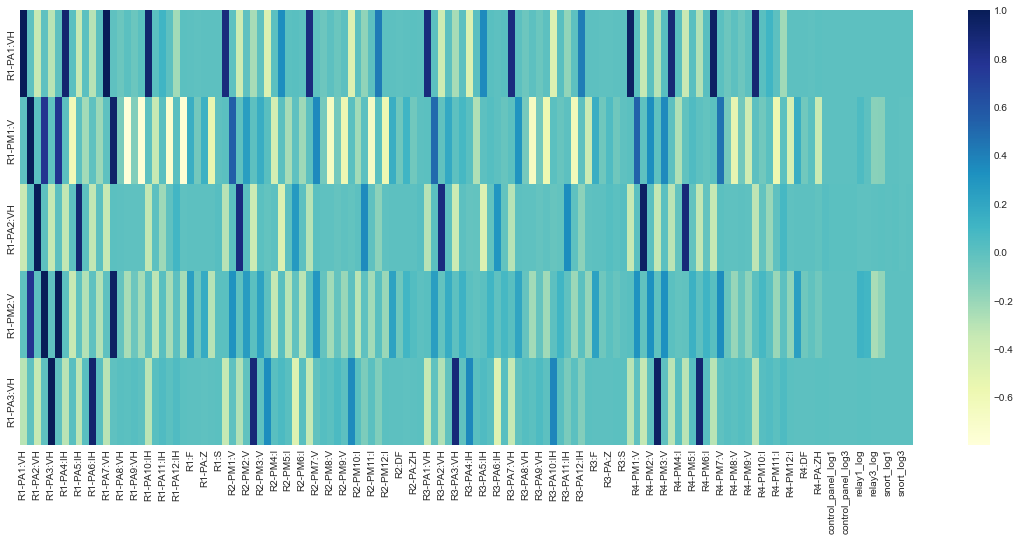

In [96]:
# For clarity purpose, we find it better to reduce the size of the correlation dataframe otherwise it won't be readable
# We are looking at the correlation between 5 columns and the rest of the columns 
data_correlation = data.corr().head(5)

# Using heatmap for the correlation matrix

plt.figure(figsize=(20,8))
a = sns.heatmap(data_correlation, cmap="YlGnBu")
plt.show()

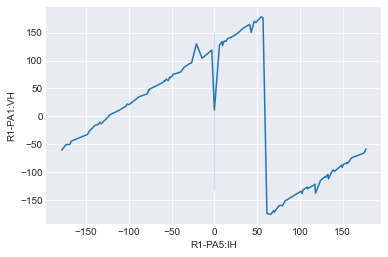

In [97]:
# Taking a sample for the visualization
data_sample = data.sample(100)

# Relationship between two distinct variables
plt.style.use('seaborn-darkgrid')
sns.lineplot(x=data_sample["R1-PA5:IH"], y=data_sample["R1-PA1:VH"], data=data_sample)
plt.show()

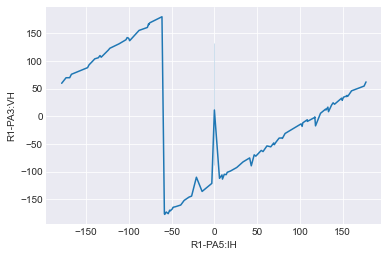

In [98]:
# Relationship between two distinct variables
plt.style.use('seaborn-darkgrid')
sns.lineplot(x=data_sample["R1-PA5:IH"], y=data_sample["R1-PA3:VH"], data=data_sample)
plt.show()

The two previous lineplots show that there are no linear relationships between the selected variables.

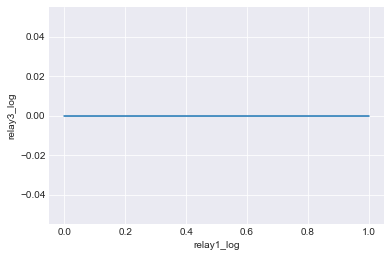

In [99]:
# Relationship between two distinct variables
plt.style.use('seaborn-darkgrid')
sns.lineplot(x=data_sample["relay1_log"], y=data_sample["relay3_log"], data=data_sample)
plt.show()

This clearly shows there is a linear relationship between the two studied variables.

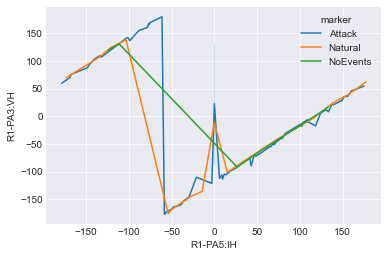

In [100]:
# Lineplot between two numerical values -- grouped by the categorical value
plt.style.use('seaborn-darkgrid')
sns.lineplot(x=data_sample["R1-PA5:IH"], y=data_sample["R1-PA3:VH"], hue=data_sample.marker, data=data_sample)
plt.show()

Again, we plot the same variables as previously and we add a third component which is the marker column.

The three representations are still not linear.

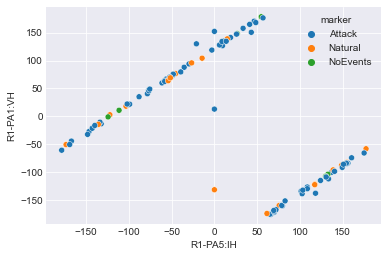

In [101]:
# Relation plot between two numerical values -- grouped by the categorical value
plt.style.use('seaborn-darkgrid')
sns.scatterplot(x=data_sample["R1-PA5:IH"], y=data_sample["R1-PA1:VH"], hue=data_sample.marker)
plt.show()

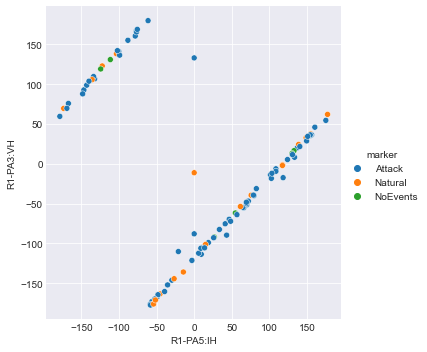

In [102]:
# Relation plot between two numerical values -- grouped by the categorical value
plt.style.use('seaborn-darkgrid')
sns.relplot(x=data_sample["R1-PA5:IH"], y=data_sample["R1-PA3:VH"], hue=data_sample.marker)
plt.show()

The scatterplots provide more details about the data points. 

They show the relationships between the two selected variables.

Moreover, we can notice that the **orange** is dominant and it is related to Attack, based on the sample we use.

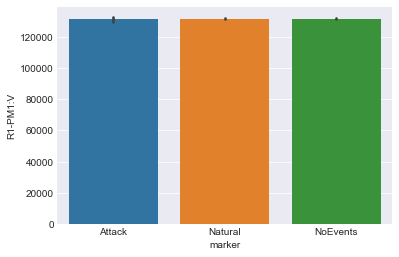

In [103]:
# Barplot
plt.style.use('seaborn-darkgrid')
sns.barplot(x=data_sample["marker"], y=data_sample["R1-PM1:V"])
plt.show()

The barplot displays the link between the marker column and this column "R1-PM1:V". 

It can be seen that the distribution is the same for the three available categories.

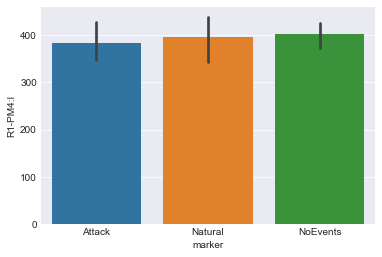

In [104]:
# Barplot
plt.style.use('seaborn-darkgrid')
sns.barplot(x=data_sample["marker"], y=data_sample["R1-PM4:I"])
plt.show()

The barplot displays the link between the marker column and this column "R1-PM4:I". 

The **Natural** category has the highest bar whereas the two others are almost equal.

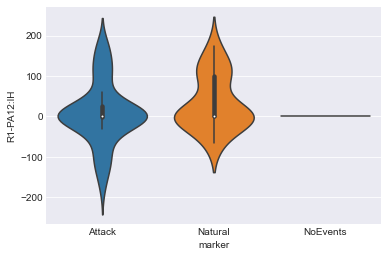

In [105]:
# ViolinPlot between two variables
plt.style.use('seaborn-darkgrid')
sns.violinplot(x=data_sample["marker"], y=data_sample["R1-PA12:IH"])
plt.show()

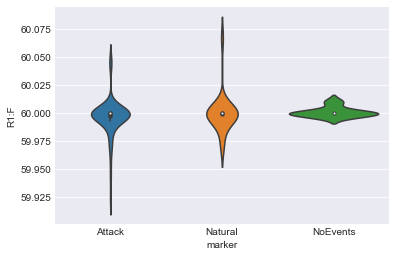

In [106]:
# ViolinPlot between two variables
plt.style.use('seaborn-darkgrid')
sns.violinplot(x=data_sample["marker"], y=data_sample["R1:F"])
plt.show()

The violin plots are another way to show the relationships between variables. 

The two first violin are narrow which indicates a smaller number of the data points.

The last one, related to NoEvents has a high width, compared to the two first. This can indicate that there is a higher number of data points.

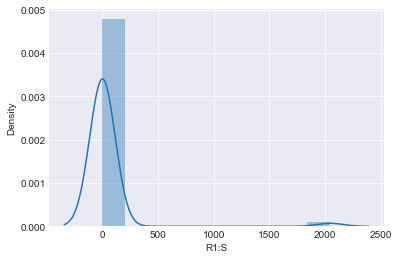

In [107]:
# Distribution curve of one variable
plt.style.use('seaborn-darkgrid')
sns.distplot(data_sample["R1:S"])
plt.show()

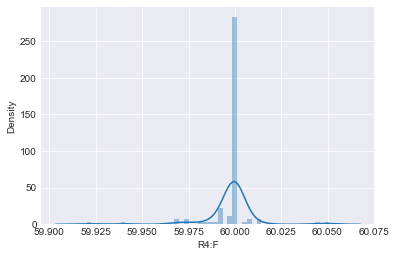

In [108]:
# Distribution curve of one variable
plt.style.use('seaborn-darkgrid')
sns.distplot(data_sample["R4:F"])
plt.show()

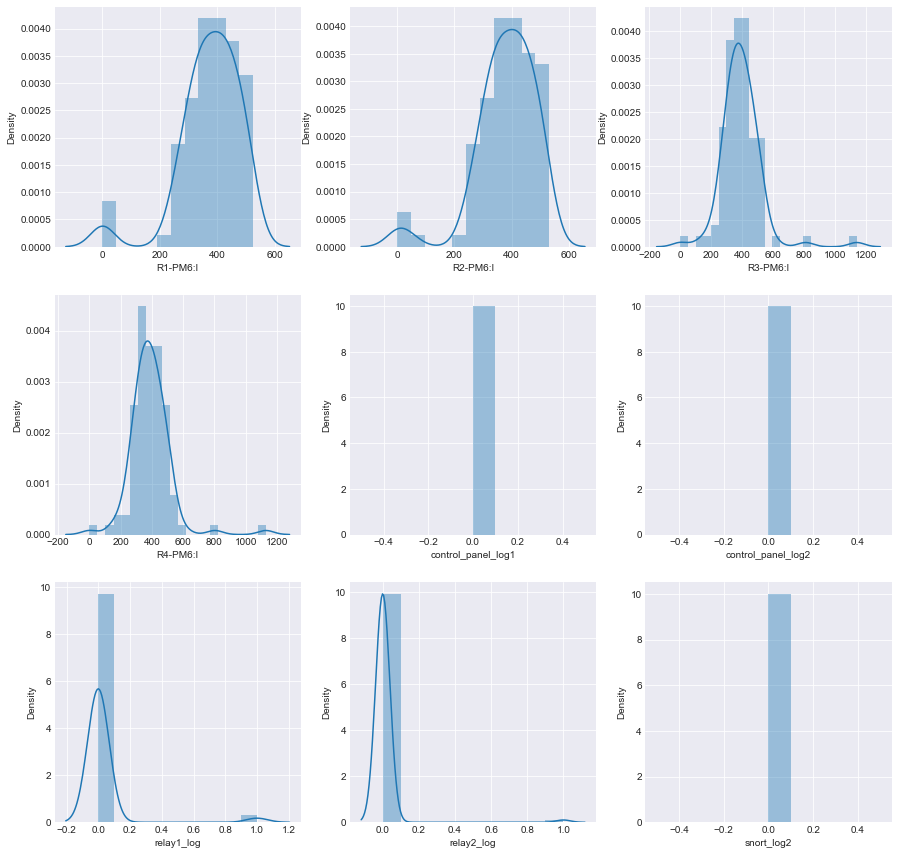

In [109]:
# Displaying multiple distributions plots (distplots) using subplot function.
fig1, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,15))
sns.distplot(data_sample["R1-PM6:I"], ax=axes[0,0])
sns.distplot(data_sample["R2-PM6:I"], ax=axes[0,1])
sns.distplot(data_sample["R3-PM6:I"], ax=axes[0,2])

sns.distplot(data_sample["R4-PM6:I"], ax=axes[1,0] )
sns.distplot(data_sample["control_panel_log1"], ax=axes[1,1] )
sns.distplot(data_sample["control_panel_log2"], ax=axes[1,2] )

sns.distplot(data_sample["relay1_log"], ax=axes[2,0])
sns.distplot(data_sample["relay2_log"], ax=axes[2,1])
sns.distplot(data_sample["snort_log2"], ax=axes[2,2])
plt.show()

All the distribution plots are related to only numerical values. 

They explain and show how the data is spread along the normal distribution curve.

While some variables have a constant distribution, we can see that other are spread more on the right side of the distribution.

Moreover, we still have some, such as the three first plots which are spread all over the distribution curve.

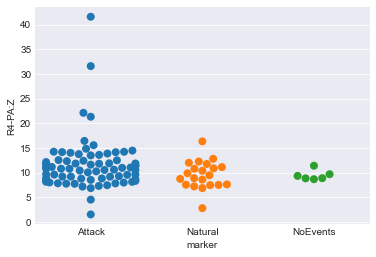

In [110]:
# SwarmPlot between the categorical column and a numerical column
sns.swarmplot(x="marker" , y = "R4-PA:Z" ,data=data_sample , size=8)
plt.show()

The swarmplot functions like a barplot with the only difference that it displays each data point. The most dominant here is related to the **Attack** category, followed by the **Natural** and finally the **NoEvents**.

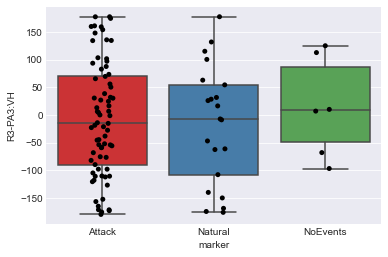

In [111]:
# Combination of stripplot and boxplot between two variables
sns.boxplot(x=data_sample.marker ,palette="Set1", y = data_sample["R3-PA3:VH"] , color='black')
sns.stripplot(x=data_sample.marker, y=data_sample["R3-PA3:VH"], jitter=True , color="black")
plt.show()

Two different plots are displayed here: The boxplot and the stripplot. Both show the distribution of the data around the median, the minimum, the maximum and the percentiles.
    
For the sample we use, it can be seen that all the data points ranged in the boxplot limits.    

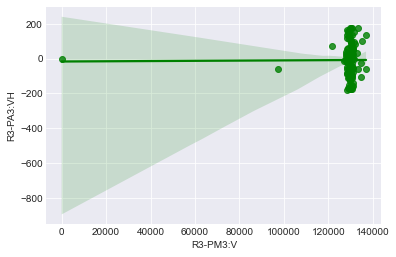

In [112]:
# Regression Plot between two variables
sns.regplot(x=data_sample["R3-PM3:V"], y=data_sample["R3-PA3:VH"], color="green")
plt.show()

This regression plot helps to visualize the relationship between two numeric variables and see if there is a linear trend.

It is obvious in the case that there is no linear trend between the two variables.

### Preprocessing

In [113]:
# This function preprocesses the data by changing the categorical values into numerical values

# It also splits the dataset passed into parameter and scale it for a better representativity

def preprocess_data(df):
    df = df.copy() # Save a copy of the dataframe before starting the preprocessing
    
    # Binary-encode the Marker column --> We could have used the LabelEncoder()
    df['marker'] = df['marker'].replace({'NoEvents': 0, 'Natural': 1, 'Attack': 2})
    
    
    # Split df into X and y
    y = df['marker'] # The independent variable (We recognize it by reading the assignment context)
    X = df.drop('marker', axis=1) # The dependent variables are the remaining columns
    
    # Train-test split (70% train and 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=0)
    
    # Scaling X
    # Remember we got several outliers previously so one of the best ways to get a better representativity is to scale the data
    # No need to scale the y
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [115]:
# data = data.copy() # Save a copy of the dataframe before starting the preprocessing
# Note: If you encounter an error for this cell, please just re-run one time
    
# Binary-encode the Marker column --> We could have used the LabelEncoder()
# We choose to replace NoEvents by 0 which is normal and means "0 Event"
# We choose to replace Attack by 2 because it is the maximum level of risk for our case
# We choose to replace Natural by 1 because it seems to be less dangerous than Attack
data['marker'] = data['marker'].replace({'NoEvents': 0, 'Natural': 1, 'Attack': 2})
    
# Split data into X and y
y = data['marker']                # The independent variable (We recognize it by reading the assignment context)
X = data.drop('marker', axis=1)   # The dependent variables are the remaining columns
    
# Train-test split (70% train and 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=0)

# Replace infinite and too large values with 0
# Needed for the scaling to work
for column in data.columns.to_list():
    data[column].replace([np.inf, -np.inf], 0, inplace=True)

# Scaling X
# Remember we got several outliers previously so one of the best ways to get a better representativity is to scale the data
# No need to scale the y
# Note: The scaling was not working until we added the previous step.
# There was an error stating that "Input contains infinity or a value too large for dtype('float64')"
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [116]:
# Displaying the X_train
X_train.head(10)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
71707,-0.325321,0.181542,-1.523103,0.116776,0.669009,0.180701,-0.271386,-0.751985,-1.547621,-0.785611,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
50801,-0.612336,0.181542,1.443252,0.116776,0.371335,0.180701,-0.584922,-0.682950,1.475076,-0.740984,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
74976,-1.398787,0.634774,0.732197,0.964918,-0.444413,0.906047,0.138857,-2.060776,-0.026417,-2.550192,...,-0.004269,-0.004269,5.113361,-0.165695,-0.165462,5.155891,-0.006038,-0.004269,-0.011296,-0.009547
49752,1.896601,0.115943,0.486588,0.015577,-0.726244,0.075717,1.887235,-0.084646,0.466916,-0.058310,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
12922,0.977882,0.095071,-0.344293,0.092681,-1.679521,0.047085,0.953244,0.012195,-0.387268,0.061098,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
34756,-1.104053,0.154706,0.998599,0.078224,-0.138787,0.142525,-1.117875,-0.418316,1.003867,-0.434625,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
38069,0.193190,0.193470,-1.053910,0.251707,1.207344,0.204562,0.289009,-0.841156,-1.079611,-0.801291,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
58733,0.169064,0.178561,-1.075575,0.121595,1.182194,0.166385,0.196329,-0.638844,-1.100529,-0.693945,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
36038,-0.894185,0.181542,1.188350,0.237251,0.078902,0.185474,-0.912495,-0.680074,1.208750,-0.801291,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
31472,-1.197945,-0.647394,0.913529,-1.213265,-0.236324,-1.145917,-1.335049,2.292270,0.823992,2.938943,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,5.155891,-0.006038,-0.004269,-0.011296,-0.009547


In [117]:
# Displaying the y_train
y_train.head(10)

71707    2
50801    2
74976    2
49752    2
12922    2
34756    2
38069    2
58733    2
36038    0
31472    2
Name: marker, dtype: int64

In [118]:
# Displaying the X_test
X_test.head(10)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
20658,0.796511,0.059289,-0.508375,0.044491,-1.867585,-0.005407,0.766273,0.337235,-0.567457,0.521842,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
19278,-0.753970,0.944879,1.315262,1.466093,0.224324,1.402335,0.138857,-2.060776,-0.026417,-2.550192,...,-0.004269,-0.004269,5.113361,6.035197,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
3724,-1.071298,0.145761,1.028017,0.174604,-0.104862,0.128209,-1.098372,-0.408727,1.044236,-0.478046,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
25733,-0.309313,-0.059982,-1.508420,-0.153088,0.685972,-0.201059,-0.349339,0.471470,-1.591555,0.731710,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
26434,-1.018164,-0.036128,1.076276,-0.114536,-0.049733,-0.162883,-1.051601,0.243271,1.054092,0.466360,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
75012,-0.161605,0.375358,-1.374834,0.545666,0.839227,0.495654,-0.184517,-0.083687,-1.351704,-0.300744,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
42079,0.270847,0.106998,-0.983780,0.111957,1.287623,0.061401,0.278020,-0.076976,-1.002387,-0.040218,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
45755,0.768751,0.172597,-0.533634,0.102319,-1.896563,0.166385,0.820581,-0.652268,-0.545700,-0.675853,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
17072,-1.242791,0.041399,0.872971,-0.104898,-0.282618,-0.043583,-1.306802,0.378464,0.845907,0.542347,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547
68520,1.309685,0.020526,-0.044110,-0.022975,-1.335022,-0.076987,1.265169,0.472429,-0.099551,0.650899,...,-0.004269,-0.004269,-0.195566,-0.165695,-0.165462,-0.193953,-0.006038,-0.004269,-0.011296,-0.009547


In [119]:
# Displaying the y_test
y_test.head(10)

20658    0
19278    2
3724     1
25733    1
26434    2
75012    2
42079    2
45755    1
17072    2
68520    2
Name: marker, dtype: int64

## Training and comparison of ML models

In [120]:
# This may take few minutes
# Random Forest Model
rf = RandomForestClassifier()                               # Model Creation
kfold = StratifiedKFold(n_splits=10, shuffle=True)          # The 10-fold splits created
scores = cross_val_score(rf, X_train, y_train, cv=kfold)    # The 10-fold cross validation applied
rf.fit(X_train,y_train)                                     # Fitting the model with the training sets
rf_prediction = rf.predict(X_test)                          # Making the prediction with the X_test
print(f"Accuracy: {scores.mean():.2f}")                     # Computing the accuracy (general performance)
print()

# The specific metrics
print("------- Specific Metrics -------")
c_report=classification_report(y_test,rf_prediction,output_dict=True)

rf_Precision=c_report['weighted avg']['precision']
rf_Recall=c_report['weighted avg']['recall']
rf_f1Score=c_report['weighted avg']['f1-score']

print()
print(f"Random_Forest_Precision: {rf_Precision:.3f}\nRandom_Forest_Recall: {rf_Recall:.3f}\
\nRandom_Forest_f1-Score: {rf_f1Score:.3f}")

Accuracy: 0.91

------- Specific Metrics -------

Random_Forest_Precision: 0.918
Random_Forest_Recall: 0.918
Random_Forest_f1-Score: 0.915


In [121]:
# Logistic Regression Model
lr = LogisticRegression()                                   # Model Creation
kfold = StratifiedKFold(n_splits=10, shuffle=True)          # The 10-fold splits created
scores = cross_val_score(lr, X_train, y_train, cv=kfold)    # The 10-fold cross validation applied
lr.fit(X_train,y_train)                                     # Fitting the model with the training sets
lr_prediction = lr.predict(X_test)                          # Making the prediction with the X_test
print(f"Accuracy: {scores.mean():.2f}")                     # Computing the accuracy (general performance)
print()


# The specific metrics
print("------- Specific Metrics -------")
c_report=classification_report(y_test,lr_prediction,output_dict=True)

lr_Precision=c_report['weighted avg']['precision']
lr_Recall=c_report['weighted avg']['recall']
lr_f1Score=c_report['weighted avg']['f1-score']

print()
print(f"Logistic_Regression_Precision: {lr_Precision:.3f}\nLogistic_Regression_Recall: {lr_Recall:.3f}\
\nLogistic_Regression_f1-Score: {lr_f1Score:.3f}")

Accuracy: 0.72

------- Specific Metrics -------

Logistic_Regression_Precision: 0.664
Logistic_Regression_Recall: 0.713
Logistic_Regression_f1-Score: 0.631


In [122]:
# K Nearest Neighbors
knn = KNeighborsClassifier()                                # Model Creation
kfold = StratifiedKFold(n_splits=10, shuffle=True)          # The 10-fold splits created
scores = cross_val_score(knn, X_train, y_train, cv=kfold)   # The 10-fold cross validation applied
knn.fit(X_train,y_train)                                    # Fitting the model with the training sets
knn_prediction = knn.predict(X_test)                        # Making the prediction with the X_test
print(f"Accuracy: {scores.mean():.2f}")                     # Computing the accuracy (general performance)
print()


# The specific metrics
print("------- Specific Metrics -------")
c_report=classification_report(y_test,knn_prediction,output_dict=True)

knn_Precision=c_report['weighted avg']['precision']
knn_Recall=c_report['weighted avg']['recall']
knn_f1Score=c_report['weighted avg']['f1-score']

print()
print(f"KNN_Precision: {knn_Precision:.3f}\nKNN_Recall: {knn_Recall:.3f}\
\nKNN_f1-Score: {knn_f1Score:.3f}")

Accuracy: 0.83

------- Specific Metrics -------

KNN_Precision: 0.841
KNN_Recall: 0.846
KNN_f1-Score: 0.842


### Choice of the metrics

***********************************************************************************************************************
***********************************************************************************************************************

**Recall**, **precision**, and **F1 Score** values provide a more comprehensive description of how the classifier makes errors .compared to **accuracy**, which only serves as a general indicator of classifier performance.

The **F1 Score** is the harmonic mean of *precision* and *recall*, while **recall** measures the genuine positive rate and **precision** the positive predictive value. Values close to 1.0 for these metrics imply excellent performance.

In our case, we are using **Accuracy** for a general performance checking. It is not considered in the three metrics we are asked for. These three metrics are **Recall - Precision - F1 Score**.

***********************************************************************************************************************
#### Conclusion

In terms of performance, the *Random Forest model comes first followed by the K Nearest Neighbors model and the last is the Logistic Regression model*.

## Feature Selection and Engineering
************************************************************************************************************************

The process of choosing a smaller subset of pertinent characteristics from a larger set of data that can be utilized to train a machine learning model is known as feature selection. The purpose of feature selection is to decrease overfitting, increase interpretability, and shorten training time in order to enhance the model's generalization capability. [7]

There are several methods to perform feature selection and we have chosen to use the **forward regression**.
*Forward regression is a feature selection method that starts with an empty set of features and iteratively adds the most predictive feature to the model until a stopping criterion is reached. The goal of forward regression is to identify a subset of features that results in the best model performance.*
************************************************************************************************************************

**An example of how forward regression might work:**

    - Begin with an empty set of features.

    - Evaluate the performance of the model using all available features.

    - Select the feature that results in the greatest improvement in model performance and add it to the feature set.

    - Repeat steps 2 and 3 until a stopping criterion is reached
    (e.g., the performance improvement falls below a certain threshold).

    - The final feature set is the set of features that resulted in the best model performance.

In [123]:
# Forward Selection function
# Due to the size of the dataset, this may take a few minutes (approximately 10 min)

def forward_regression(x, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(x.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

# The needed parameters
a = data.drop('marker', axis=1)         # The dependent variables
x = sm.add_constant(a)                  # Using statsmodels instance to add a constant and use the result as our x
y = data['marker']                      # The independent variable

# Calling the function with the defined parameters
# Verbose is set to True to have an idea of the process 
forward_regression(x,y,threshold_in=0.05, verbose=True)

Add  const                          with p-value 0.0
Add  R2-PM1:V                       with p-value 3.66545e-63
Add  R4-PM2:V                       with p-value 9.39009e-68
Add  R4-PM3:V                       with p-value 0.0
Add  R1-PA:ZH                       with p-value 4.69701e-55
Add  R4-PM12:I                      with p-value 3.55956e-58
Add  R4-PA:ZH                       with p-value 1.02101e-57
Add  relay3_log                     with p-value 4.1136e-45
Add  R2-PA6:IH                      with p-value 2.92394e-30
Add  R3-PA5:IH                      with p-value 3.64043e-35
Add  R3-PA10:IH                     with p-value 1.03665e-19
Add  R4-PM8:V                       with p-value 1.27097e-18
Add  R1-PM12:I                      with p-value 2.61579e-28
Add  R3-PM11:I                      with p-value 4.84793e-53
Add  R4-PM7:V                       with p-value 1.74593e-31
Add  R4-PM11:I                      with p-value 9.94857e-39
Add  R4-PM9:V                       with 

['const',
 'R2-PM1:V',
 'R4-PM2:V',
 'R4-PM3:V',
 'R1-PA:ZH',
 'R4-PM12:I',
 'R4-PA:ZH',
 'relay3_log',
 'R2-PA6:IH',
 'R3-PA5:IH',
 'R3-PA10:IH',
 'R4-PM8:V',
 'R1-PM12:I',
 'R3-PM11:I',
 'R4-PM7:V',
 'R4-PM11:I',
 'R4-PM9:V',
 'R3-PM3:V',
 'R3-PM2:V',
 'R2-PM3:V',
 'R2-PM2:V',
 'relay1_log',
 'R2-PM7:V',
 'R3-PM1:V',
 'R1-PM2:V',
 'R1-PM3:V',
 'R2-PM8:V',
 'R3-PM8:V',
 'R2-PA:ZH',
 'relay2_log',
 'R3-PA:ZH',
 'R1-PM1:V',
 'R2-PA3:VH',
 'R1-PA3:VH',
 'R1-PA12:IH',
 'R2-PA12:IH',
 'R3-PA1:VH',
 'R4-PA7:VH',
 'R2-PA2:VH',
 'R2-PA5:IH',
 'R1-PA11:IH',
 'R3-PA:Z',
 'R3-PM9:V',
 'R3-PM12:I',
 'R2-PM12:I',
 'R1-PM8:V',
 'R2:DF',
 'R2-PM9:V',
 'R4-PA3:VH',
 'R2-PA10:IH',
 'R2-PA:Z',
 'R3-PA8:VH',
 'snort_log1',
 'R2:F',
 'R3:F',
 'R1-PA4:IH',
 'R3-PM5:I',
 'R3-PM6:I',
 'R3-PM10:I',
 'R3-PM4:I',
 'R4-PM4:I',
 'R4-PM6:I',
 'R4-PM10:I',
 'R4-PM5:I',
 'R1-PA2:VH']

As a result, it turns out that ***64 variables out of the 128 numerical columns*** have been selected as best features.

This accounts for the half of the numerical columns which is quite interesting.

For confirmation, we create in the next cell, a list of the **new features** and compute the length.

In [124]:
new_features = [
 'R2-PM1:V',
 'R4-PM2:V',
 'R4-PM3:V',
 'R1-PA:ZH',
 'R4-PM12:I',
 'R4-PA:ZH',
 'relay3_log',
 'R2-PA6:IH',
 'R3-PA5:IH',
 'R3-PA10:IH',
 'R4-PM8:V',
 'R1-PM12:I',
 'R3-PM11:I',
 'R4-PM7:V',
 'R4-PM11:I',
 'R4-PM9:V',
 'R3-PM3:V',
 'R3-PM2:V',
 'R2-PM3:V',
 'R2-PM2:V',
 'relay1_log',
 'R2-PM7:V',
 'R3-PM1:V',
 'R1-PM2:V',
 'R1-PM3:V',
 'R2-PM8:V',
 'R3-PM8:V',
 'R2-PA:ZH',
 'relay2_log',
 'R3-PA:ZH',
 'R1-PM1:V',
 'R2-PA3:VH',
 'R1-PA3:VH',
 'R1-PA12:IH',
 'R2-PA12:IH',
 'R3-PA1:VH',
 'R4-PA7:VH',
 'R2-PA2:VH',
 'R2-PA5:IH',
 'R1-PA11:IH',
 'R3-PA:Z',
 'R3-PM9:V',
 'R3-PM12:I',
 'R2-PM12:I',
 'R1-PM8:V',
 'R2:DF',
 'R2-PM9:V',
 'R4-PA3:VH',
 'R2-PA10:IH',
 'R2-PA:Z',
 'R3-PA8:VH',
 'snort_log1',
 'R2:F',
 'R3:F',
 'R1-PA4:IH',
 'R3-PM5:I',
 'R3-PM6:I',
 'R3-PM10:I',
 'R3-PM4:I',
 'R4-PM4:I',
 'R4-PM6:I',
 'R4-PM10:I',
 'R4-PM5:I',
 'R1-PA2:VH']

# Checking the length of this list
len(new_features)

64

In [125]:
# Changing our training sets since the number of features has changed to 64 now
new_X_train = X_train[new_features]
new_X_test = X_test[new_features]

### New Models

- All of the models have been created in the previous cells so no need to repeat the creation process


- rf, lr and knn respectively for *Random Forest, Logistic Regression and K Nearest Neighbors* models


- Nevertheless, we will fit them again using the new training  

In [126]:
# New Random Forest Model
scores = cross_val_score(rf, new_X_train, y_train, cv=kfold)    # The 10-fold cross validation applied
rf.fit(new_X_train,y_train)                                     # Fitting the model with the new training sets
rf_prediction = rf.predict(new_X_test)                          # Making the prediction with the new X_test
print(f"Accuracy: {scores.mean():.2f}")                         # Computing the accuracy (general performance)
print()

# The new specific metrics
print("------- Specific Metrics -------")
c_report=classification_report(y_test,rf_prediction,output_dict=True)

rf_Precision=c_report['weighted avg']['precision']
rf_Recall=c_report['weighted avg']['recall']
rf_f1Score=c_report['weighted avg']['f1-score']

print()
print(f"New Random_Forest_Precision: {rf_Precision:.3f}\nNew Random_Forest_Recall: {rf_Recall:.3f}\
\nNew Random_Forest_f1-Score: {rf_f1Score:.3f}")

Accuracy: 0.90

------- Specific Metrics -------

New Random_Forest_Precision: 0.910
New Random_Forest_Recall: 0.910
New Random_Forest_f1-Score: 0.906


In [127]:
# New Logistic Regression Model
scores = cross_val_score(lr, new_X_train, y_train, cv=kfold)    # The 10-fold cross validation applied
lr.fit(new_X_train,y_train)                                     # Fitting the model with the new training sets
lr_prediction = lr.predict(new_X_test)                          # Making the prediction with the new X_test
print(f"Accuracy: {scores.mean():.2f}")                         # Computing the accuracy (general performance)
print()


# The new specific metrics
print("------- New Specific Metrics -------")
c_report=classification_report(y_test,lr_prediction,output_dict=True)

lr_Precision=c_report['weighted avg']['precision']
lr_Recall=c_report['weighted avg']['recall']
lr_f1Score=c_report['weighted avg']['f1-score']

print()
print(f"New Logistic_Regression_Precision: {lr_Precision:.3f}\nNew Logistic_Regression_Recall: {lr_Recall:.3f}\
\nNew Logistic_Regression_f1-Score: {lr_f1Score:.3f}")

Accuracy: 0.72

------- New Specific Metrics -------

New Logistic_Regression_Precision: 0.660
New Logistic_Regression_Recall: 0.709
New Logistic_Regression_f1-Score: 0.621


In [128]:
# New K Nearest Neighbors
scores = cross_val_score(knn, new_X_train, y_train, cv=kfold)   # The 10-fold cross validation applied
knn.fit(new_X_train,y_train)                                    # Fitting the model with the new training sets
knn_prediction = knn.predict(new_X_test)                        # Making the prediction with the new X_test
print(f"Accuracy: {scores.mean():.2f}")                         # Computing the accuracy (general performance)
print()


# The specific metrics
print("------- New Specific Metrics -------")
c_report=classification_report(y_test,knn_prediction,output_dict=True)

knn_Precision=c_report['weighted avg']['precision']
knn_Recall=c_report['weighted avg']['recall']
knn_f1Score=c_report['weighted avg']['f1-score']

print()
print(f"New KNN_Precision: {knn_Precision:.3f}\nNew KNN_Recall: {knn_Recall:.3f}\
\nNew KNN_f1-Score: {knn_f1Score:.3f}")

Accuracy: 0.84

------- New Specific Metrics -------

New KNN_Precision: 0.840
New KNN_Recall: 0.845
New KNN_f1-Score: 0.841


### New Metrics

The metrics value have not really changed. Some decrease at a very small rate while others increase at a small rate too.

It can be inferred from this that the 64 new features do not add too much value to the models performances.

Still, the Random Forest comes first, then the KNN and finally the Logistic Regression. 

## Hyperparameters Tuning

Hyperparameter tuning is the process of finding the optimal values for the hyperparameters of a machine learning model.

Hyperparameters are the parameters that are set before training a model and cannot be learned from the data. [8]

There are several methods for hyperparameter tuning, including manual tuning, grid search, and random search.

For this project purpose, we are asked to use **Grid Search**.

#### Our benchmark model is the Random Forest Model.

***********************************************************************************************************************

There are several parameters that can be used within Random Forest model. [9]

We chose to use the following because after several trials, they are the ones that have an important effect on the performance of the model.


* n estimators

* max_depth

* min samples split

* min_samples_leaf


In [58]:
# This may take up to 40 min to run
# The first executions provided a score which is lower than the previous model score
# We have to adjust the parameters again and again to try to get a better score

# Define the model
last_rf = RandomForestClassifier(random_state=42)

# Set up the parameters for the grid search --> Limit the instances so the process can be faster
parameters = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 20,],
              'min_samples_split': [2, 5],
             # 'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf' : [8, 10]}

# Create the grid search object
# Set the verbosity level to 6 (for full details) and cv to 10
grid_search = GridSearchCV(estimator=last_rf, param_grid=parameters, cv=10, verbose=6, n_jobs=-1)

# Fit the grid search to the data (The X_train is now replaced by the new_X_train --> the 64 features)
grid_search.fit(new_X_train, y_train)

# Print the best parameters found
print(grid_search.best_params_)
print()

# Print the best score achieved
print(grid_search.best_score_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 300}

0.8545649376004969


### What's next?

* After getting a satisfying score for the tuned model, we are now going to train a new random forest model using the best combination of hyperparameters.


* Again, we will fit the model, make the prediction using the test sets and finally compute the performance metrics.


* For comparison purpose, we will then plot some barcharts to illustrate the difference between those metrics.

In [65]:
# The specific metrics
print("------- Specific Metrics -------")
best_rf = RandomForestClassifier(max_depth=None, min_samples_leaf=8, min_samples_split=2, random_state=42, n_estimators=300)
best_rf.fit(new_X_train, y_train)
best_pred = best_rf.predict(new_X_test)
c_report=classification_report(y_test, best_pred, output_dict=True)

gs_Precision=c_report['weighted avg']['precision']
gs_Recall=c_report['weighted avg']['recall']
gs_f1Score=c_report['weighted avg']['f1-score']

print()
print(f"Tuned Model_Precision: {gs_Precision:.3f}\nTuned_Model_Recall: {gs_Recall:.3f}\
\nTuned Model_f1-Score: {gs_f1Score:.3f}")

------- Specific Metrics -------

Tuned Model_Precision: 0.866
Tuned_Model_Recall: 0.860
Tuned Model_f1-Score: 0.847


### Visualizations for models performance comparison

In [66]:
# Retrieve precision, recall, and f1-score for each model and adding them to lists
precisions={"RF With New Features":rf_Precision, "RF Tuned":gs_Precision}
recalls={"RF New Features":rf_Recall, "RF Tuned":gs_Recall}
f1_scores={"RF New Features":rf_f1Score, "RF Tuned":gs_f1Score}

# Creating lists to hold the previous lists keys and values 
models1=list(precisions.keys())
models2=list(recalls.keys())
models3=list(f1_scores.keys())

modelPrecisions=list(precisions.values())
modelRecalls=list(recalls.values())
modelF1=list(f1_scores.values())

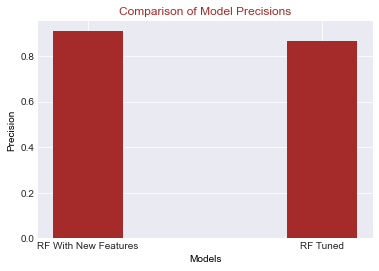

In [67]:
# Plotting the graph of precision
plt.bar(models1, modelPrecisions, width = 0.3, color="brown")

# Setting up other properties e.g. color, label and title
plt.xlabel("Models", color='black')
plt.ylabel("Precision", color='black')
plt.title("Comparison of Model Precisions", color='Brown')
plt.show()

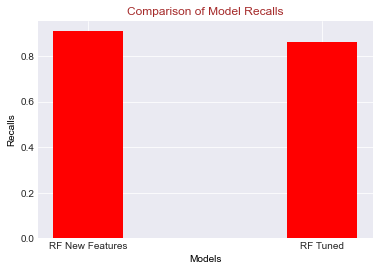

In [68]:
# Plotting the graph of recalls
plt.bar(models2, modelRecalls, width = 0.3, color="red")
plt.xlabel("Models", color='black')
plt.ylabel("Recalls", color='black')
plt.title("Comparison of Model Recalls", color='Brown')
plt.show()

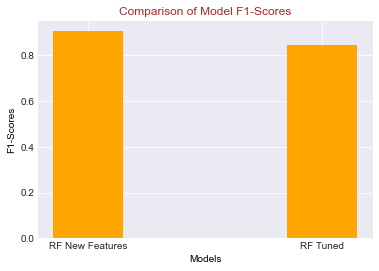

In [69]:
# Plotting the graph of F1-Scores
plt.bar(models3, modelF1, width = 0.3, color="orange")
plt.xlabel("Models", color='black')
plt.ylabel("F1-Scores", color='black')
plt.title("Comparison of Model F1-Scores", color='Brown')
plt.show()

## References



- [1] Editor, CSRC Content. “Industrial Control System (ICS) - Glossary | CSRC.” Csrc.nist.gov, csrc.nist.gov/glossary/term/industrial_control_system. Accessed 16 Dec. 2022.


- [2] Wikipedia Contributors. “National Institute of Standards and Technology.” Wikipedia, Wikimedia Foundation, 10 Sept. 2019, en.wikipedia.org/wiki/National_Institute_of_Standards_and_Technology. Accessed 16 Dec. 2022.


- [3] “Tommy Morris - Industrial Control System (ICS) Cyber Attack Datasets.” Sites.google.com, sites.google.com/a/uah.edu/tommy-morris-uah/ics-data-sets?pli=1. Accessed 16 Dec. 2022.


- [4] Beaver, J., Borges, R., Buckner, M., Morris, T., Adhikari, U., Pan, S., Machine Learning for Power System 
Disturbance and Cyber-attack Discrimination, Proceedings of the 7th International Symposium on Resilient 
Control Systems, August 19-21,2014, Denver, CO, USA.


- [5] “Intelligent Electronic Device.” Wikipedia, 5 Nov. 2020, en.wikipedia.org/wiki/Intelligent_electronic_device. Accessed 16 Dec. 2022.


- [6] “Intelligent Electronic Devices.” Midwest Engineered Systems, www.mwes.com/types-of-industrial-control-systems/intelligent-electronic-devices/. Accessed 16 Dec. 2022.



- [7]  “Feature Selection for Machine Learning in Python.” Machine Learning Mastery, 21 Aug. 2019, machinelearningmastery.com/feature-selection-machine-learning-python/. Accessed 17 Dec. 2022.


- [8] “3.2. Tuning the Hyper-Parameters of an Estimator — Scikit-Learn 0.22 Documentation.” Scikit-Learn.org, 2012, scikit-learn.org/stable/modules/grid_search.html. Accessed 17 Dec. 2022.


- [9] “Random Forest Hyperparameter Tuning: Processes Explained with Coding.” UpGrad Blog, 23 Sept. 2022, www.upgrad.com/blog/random-forest-hyperparameter-tuning/. Accessed 17 Dec. 2022.